# Train Test Split, Mean Squared Error(MSE) and R2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  brain.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  /*1=Male, 2=Female*/
AGE: Age Range  /*1=20-46, 2=46+*/
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32

In [2]:
# Read the csv file
brains = pd.read_csv("Resources/brain.csv")
brains.head()

,gender,age,size,weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# Assign the data to X and y
X = brains["weight"].values.reshape(-1, 1)
y = brains["size"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (237, 1) (237, 1)


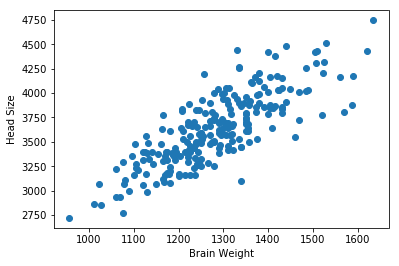

In [6]:
# Visualize the data set
plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Head Size")

## Train Test Split
In order to quantify our model against new input values, we split the data into training and test sets. The model is then fit to the training set and scored by the test set.

In [7]:
# Call train_test_split function from sklearn, test set is 0.25(25%) by default
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Call linear function from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Fit the model to the data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Mean Squared Error(MSE) and R Squared Value(R2)
MSE: Measures the average of the squares of the errors or deviations. <br>
R2: Higher R2 values signify that the model is **highly predictive**. An R2 value of >0.90 means that our model roughly accounts for 90% of the variablity of the data.

In [13]:
# Calculate the mean_squared_error and the r-squared value for the test set
from sklearn.metrics import mean_squared_error, r2_score

# Run the X_test on our model which was traind by X_train and y_train to get predictions
predicted = model.predict(X_test)                  

In [14]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 51228.19330570998
R-squared (R2): 0.6568088729208812


In [15]:
# Alternatively, we can directly use score method on the model to show the r2 score
model.score(X_test, y_test)

0.6568088729208812